In [134]:
import pandas as pd
import matplotlib.pyplot as plt

In [135]:
players_data = pd.read_csv("../datasets/visualisation_hw/player_data.csv")

In [136]:
players_data.head()

,name,year_start,year_end,position,height,weight,birth_date,college
0,Alaa Abdelnaby,1991,1995,F-C,6-10,240.0,"June 24, 1968",Duke University
1,Zaid Abdul-Aziz,1969,1978,C-F,6-9,235.0,"April 7, 1946",Iowa State University
2,Kareem Abdul-Jabbar,1970,1989,C,7-2,225.0,"April 16, 1947","University of California, Los Angeles"
3,Mahmoud Abdul-Rauf,1991,2001,G,6-1,162.0,"March 9, 1969",Louisiana State University
4,Tariq Abdul-Wahad,1998,2003,F,6-6,223.0,"November 3, 1974",San Jose State University


In [137]:
players_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4550 entries, 0 to 4549
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        4550 non-null   object 
 1   year_start  4550 non-null   int64  
 2   year_end    4550 non-null   int64  
 3   position    4549 non-null   object 
 4   height      4549 non-null   object 
 5   weight      4544 non-null   float64
 6   birth_date  4519 non-null   object 
 7   college     4248 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 284.5+ KB


#### Convert datatypes for some features to make it easier to work with:


Converting height to cm

In [138]:
players_data["height"] = players_data["height"].fillna("0-0")
players_data["height"] = players_data["height"].apply(
    lambda x: int(x.split("-")[0]) * 30.48 + int(x.split("-")[1]) * 2.54
)

Calculating the career properties - length, start age & end age

In [139]:
players_data["career_years"] = players_data.apply(
    lambda player: player["year_end"] - player["year_start"], axis=1
)

In [140]:
players_data["birth_date"].isna().sum() / players_data.shape[0]

0.006813186813186814

Remove players without birt's date because visualisation will be hardly depend on it and there is not a lot of such records

In [141]:
players_data = players_data[players_data["birth_date"].notna()]

In [142]:
def get_decade(date):
    if isinstance(date, str):
        date = date.rsplit(" ")[-1]
    return int(date) - int(date) % 10

players_data["birth_year"] = players_data["birth_date"].apply(get_decade)
players_data["birth_decade"] = players_data["birth_year"].apply(get_decade)
players_data["decade_start"] = players_data["year_start"].apply(get_decade)
players_data["decade_end"] = players_data["year_end"].apply(get_decade)

players_data["age_start"] = players_data["year_start"] - players_data["birth_year"]
players_data["age_end"] = players_data["year_end"] - players_data["birth_year"]


In [143]:
players_data.head()

,name,year_start,year_end,position,height,weight,birth_date,college,career_years,birth_year,birth_decade,decade_start,decade_end,age_start,age_end
0,Alaa Abdelnaby,1991,1995,F-C,208.28,240.0,"June 24, 1968",Duke University,4,1960,1960,1990,1990,31,35
1,Zaid Abdul-Aziz,1969,1978,C-F,205.74,235.0,"April 7, 1946",Iowa State University,9,1940,1940,1960,1970,29,38
2,Kareem Abdul-Jabbar,1970,1989,C,218.44,225.0,"April 16, 1947","University of California, Los Angeles",19,1940,1940,1970,1980,30,49
3,Mahmoud Abdul-Rauf,1991,2001,G,185.42,162.0,"March 9, 1969",Louisiana State University,10,1960,1960,1990,2000,31,41
4,Tariq Abdul-Wahad,1998,2003,F,198.12,223.0,"November 3, 1974",San Jose State University,5,1970,1970,1990,2000,28,33


#### Some features during the time

<Axes: xlabel='year_start'>

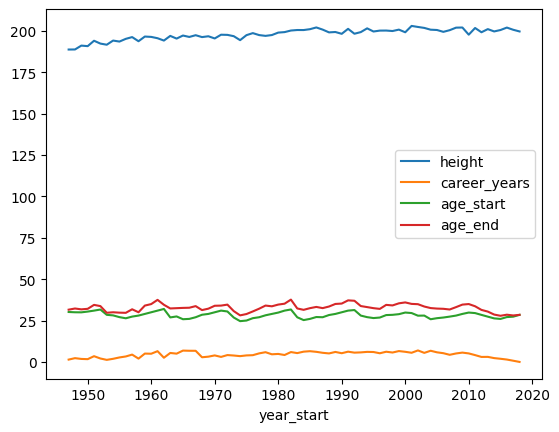

In [149]:
players_data.groupby("year_start").aggregate({"height": "mean", "career_years": "mean", "age_start": "mean", "age_end": "mean"}).plot(kind="line")

<Axes: xlabel='decade_start'>

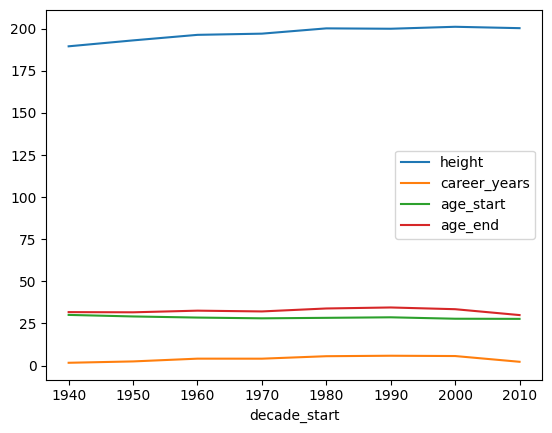

In [150]:
players_data.groupby("decade_start").aggregate({"height": "mean", "career_years": "mean", "age_start": "mean", "age_end": "mean"}).plot(kind="line")

<Axes: xlabel='decade_start'>

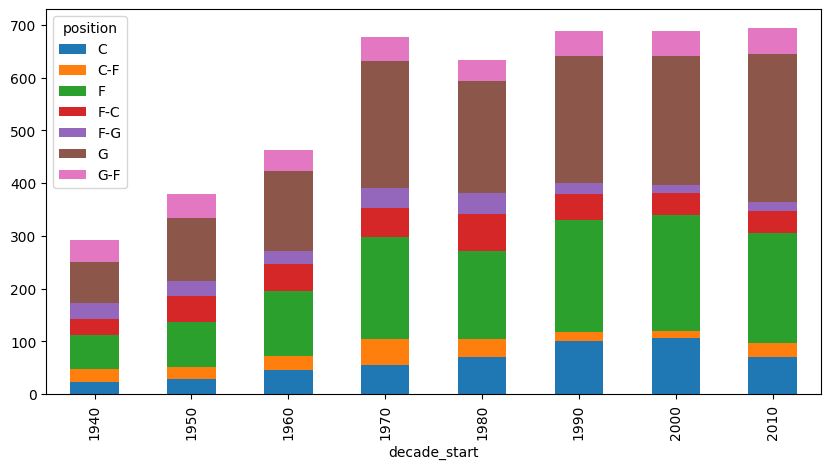

In [151]:
position_counts = players_data.groupby(['decade_start', 'position']).size().unstack()

position_counts.plot(kind='bar', stacked=True, figsize=(10, 5))

,name,year_start,year_end,position,height,weight,birth_date,college,career_years,birth_year,career_start_age,career_end_age
0,Alaa Abdelnaby,1991,1995,F-C,208.28,240.0,"June 24, 1968",Duke University,4,1968,23,27
1,Zaid Abdul-Aziz,1969,1978,C-F,205.74,235.0,"April 7, 1946",Iowa State University,9,1946,23,32
2,Kareem Abdul-Jabbar,1970,1989,C,218.44,225.0,"April 16, 1947","University of California, Los Angeles",19,1947,23,42
3,Mahmoud Abdul-Rauf,1991,2001,G,185.42,162.0,"March 9, 1969",Louisiana State University,10,1969,22,32
4,Tariq Abdul-Wahad,1998,2003,F,198.12,223.0,"November 3, 1974",San Jose State University,5,1974,24,29
